# Loan Default Prediction

### Dataset Content & Explanation

###### File - Application Record.csv

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|CODE_GENDER|Gender|
|FLAG_OWN_CAR|Is there a car|
|FLAG_OWN_REALTY|Is there a property|
|CNT_CHILDREN|Number of children|
|AMT_INCOME_TOTAL|Annual income|
|NAME_INCOME_TYPE|Income category|
|NAME_EDUCATION_TYPE|Education level|
|NAME_FAMILY_STATUS|Marital status|
|NAME_HOUSING_TYPE|Way of living|
|DAYS_BIRTH|Birthday|
|DAYS_EMPLOYED|Start date of employment|
|FLAG_MOBIL|Is there a mobile phone|
|FLAG_WORK_PHONE|Is there a work phone|
|FLAG_PHONE|Is there a phone|
|FLAG_EMAIL|Is there an email|
|OCCUPATION_TYPE|Occupation|
|CNT_FAM_MEMBERS|Family size|


* Note -                                                                                                                       
DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday                                                       
DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

###### File - Credit Record.csv

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|MONTHS_BALANCE|Record month|
|STATUS|Status|

* Note -                                                                                                                       
MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.                                                                                                        
STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

### Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from dython.nominal import associations

import warnings 
warnings.filterwarnings("ignore")

## 1. Load Dataset

In [113]:
app_df = pd.read_csv("./dataset/application_record.csv")
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [114]:
app_df.shape

(438557, 18)

In [115]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [116]:
credit_df = pd.read_csv("./dataset/credit_record.csv") 
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [117]:
credit_df.shape

(1048575, 3)

In [118]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## 2.Data preprocessing

### 2.1 Exploratory Data Analysis (EDA)

#### On File - Application Record.csv

In [119]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [120]:
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [121]:
# dropping occupation type which has many null values
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [122]:
# Checking duplicates in 'ID' column
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [123]:
# Dropping duplicate entries from ID column
app_df = app_df.drop_duplicates('ID', keep='last') 

In [124]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [125]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [126]:
# Checking unique values from Categorical Columns

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

In [127]:
# Checking unique values from Numerical Columns

In [128]:
app_df['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [129]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [130]:
# Converting 'DAYS_BIRTH' values from Day to Years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [131]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

In [132]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [133]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)   

In [134]:
app_df['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [135]:
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [136]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [137]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [138]:
app_df['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [139]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [140]:
app_df['FLAG_EMAIL'].value_counts()

0    391062
1     47448
Name: FLAG_EMAIL, dtype: int64

In [141]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

In [142]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

## 2.2 Visualization

<AxesSubplot:>

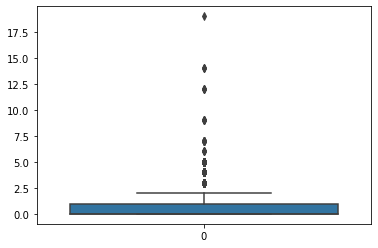

In [143]:
#create plot to detect outliers
sns.boxplot(data = app_df['CNT_CHILDREN'])

<AxesSubplot:>

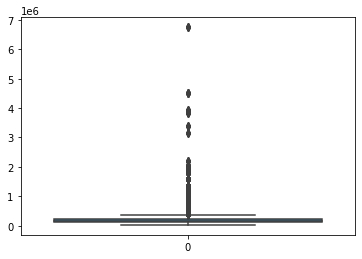

In [144]:
sns.boxplot(data = app_df['AMT_INCOME_TOTAL'])

<AxesSubplot:>

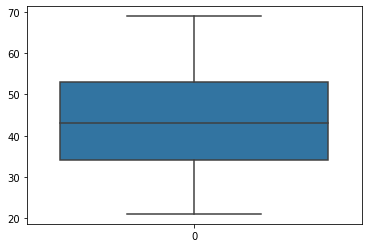

In [145]:
sns.boxplot(data = app_df['AGE_YEARS'])

<AxesSubplot:>

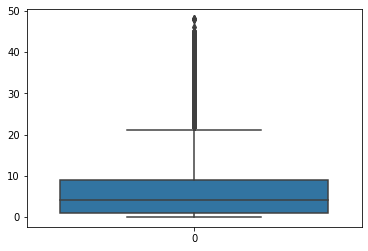

In [146]:
sns.boxplot(data=app_df['YEARS_EMPLOYED'])

<AxesSubplot:>

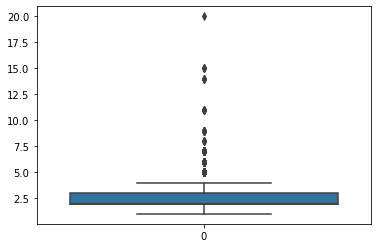

In [147]:
sns.boxplot(data=app_df['CNT_FAM_MEMBERS'])

## 2.3 Removing Outliers

In [148]:
high_bound = app_df['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [149]:
app_df = app_df[(app_df['CNT_CHILDREN']>=low_bound) & (app_df['CNT_CHILDREN']<=high_bound)]

In [150]:
high_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [151]:
app_df = app_df[(app_df['AMT_INCOME_TOTAL']>=low_bound) & (app_df['AMT_INCOME_TOTAL']<=high_bound)]

In [152]:
high_bound = app_df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 40.0
low_bound : 0.0


In [153]:
app_df = app_df[(app_df['YEARS_EMPLOYED']>=low_bound) & (app_df['YEARS_EMPLOYED']<=high_bound)]

In [154]:
high_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [155]:
app_df = app_df[(app_df['CNT_FAM_MEMBERS']>=low_bound) & (app_df['CNT_FAM_MEMBERS']<=high_bound)]

In [156]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [157]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [158]:
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [159]:
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [160]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [161]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [162]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [163]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [164]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

## 2.4 Merging Dataframes

In [165]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')

In [166]:
final_df.shape

(36326, 14)

In [167]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)

In [168]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

25268

In [169]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [170]:
final_df.shape

(11058, 13)

In [171]:
# Check for null values
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [172]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.513294
1    21.486706
Name: STATUS, dtype: float64

## 2.5 Visualization on final dataset

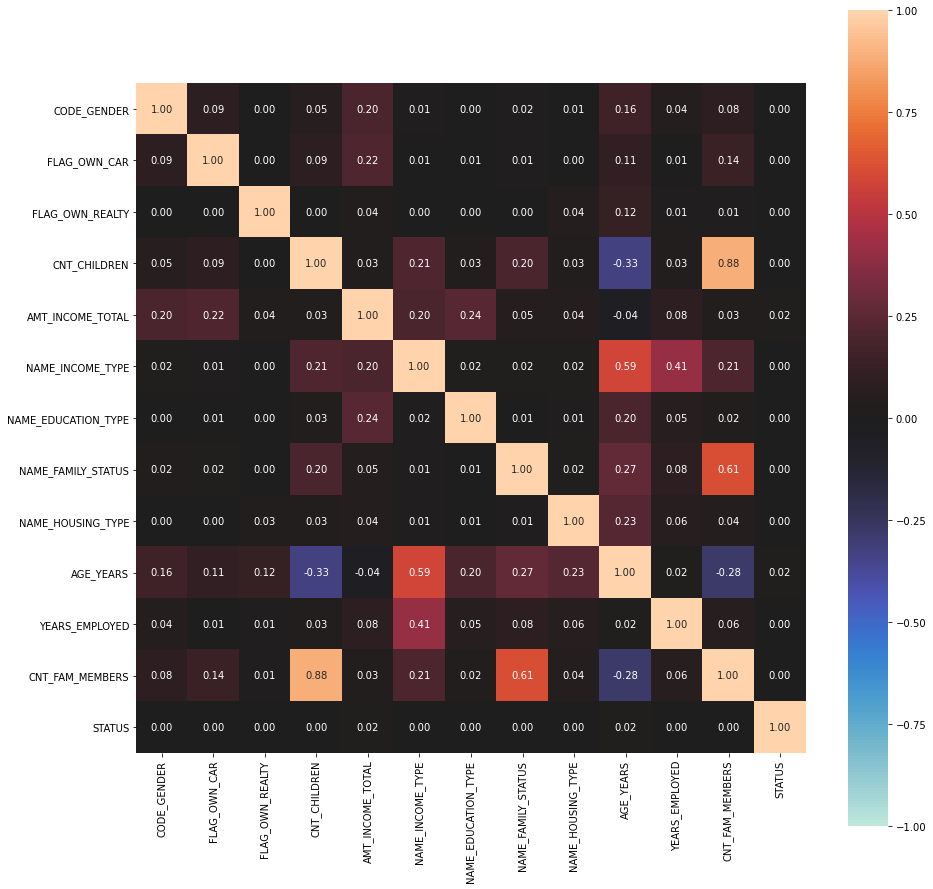

In [173]:
cat_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','STATUS']
corr = associations(dataset=final_df,theil_u=True,nominal_columns=cat_cols,figsize=(15,15)) 

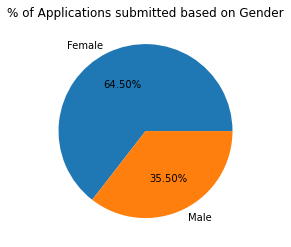

In [174]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

In [175]:
f = final_df[final_df.CODE_GENDER=='F']
m = final_df[final_df.CODE_GENDER=='M']

print("Percentage of default loans based on Gender\n")
print('Female: ',100*f[f.STATUS == 1].shape[0]/f[f.STATUS == 0].shape[0],'%')
print('Male: ',100*m[m.STATUS == 1].shape[0]/m[m.STATUS == 0].shape[0],'%')

Percentage of default loans based on Gender

Female:  27.26623840114204 %
Male:  27.55035737491878 %


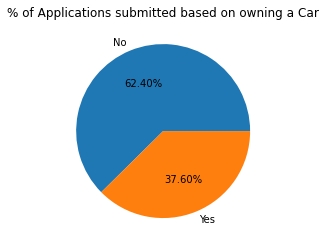

In [176]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

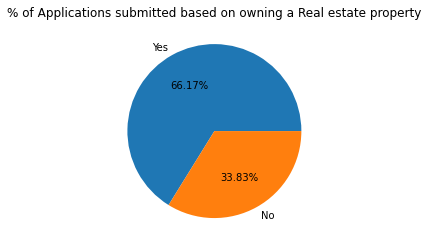

In [177]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

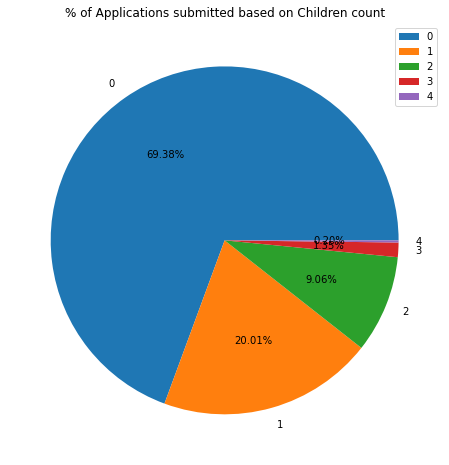

In [178]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

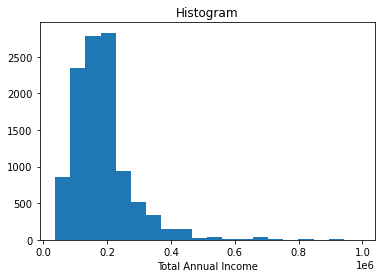

In [179]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 hundred thousand 
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

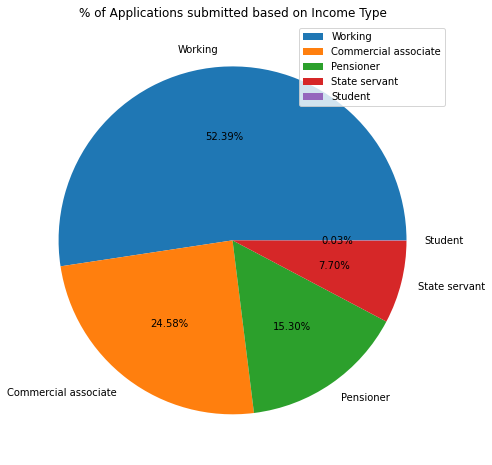

In [180]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

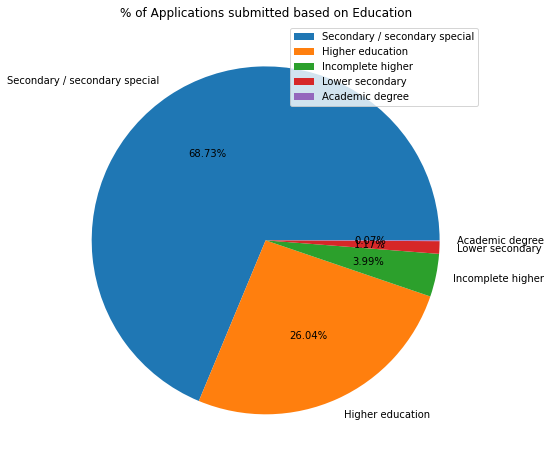

In [181]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

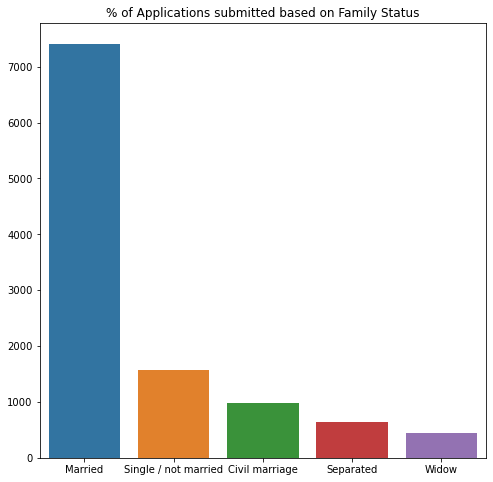

In [182]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(x= final_df['NAME_FAMILY_STATUS'].value_counts().index, y=final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

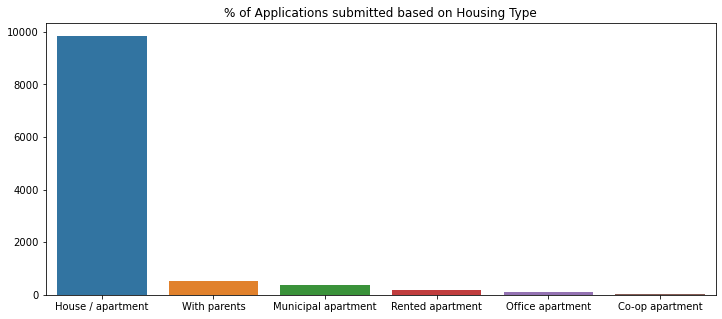

In [183]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(x=final_df['NAME_HOUSING_TYPE'].value_counts().index, y=final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

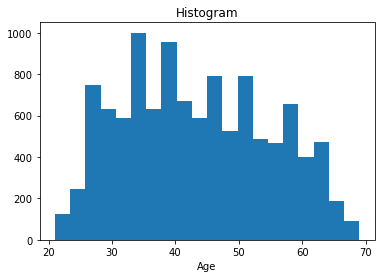

In [184]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

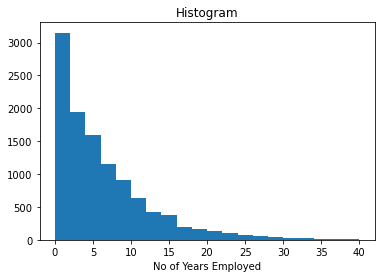

In [185]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

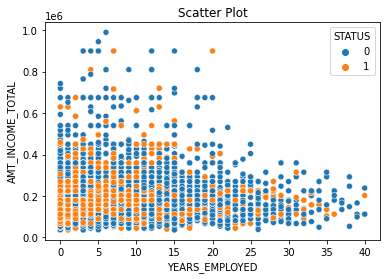

In [186]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(x=final_df['YEARS_EMPLOYED'], y=final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

## 2.6 Feature Encoding

In [187]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [188]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col]) 

In [189]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [190]:
# OneHot Encoding features with multiple(i.e >2) catagories 

# cat = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
# for i in cat:
#     temp = pd.get_dummies(final_df[i],prefix=i,drop_first=True)
#     final_df = pd.concat([final_df,temp],axis=1)
#     final_df.drop(i,inplace = True,axis=1)

In [191]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

### Visualize using PCA
- 

<AxesSubplot:>

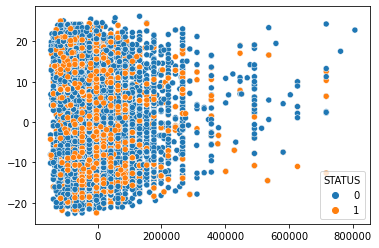

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

final_df_pca = pca.fit_transform(X=features)
sns.scatterplot(x=final_df_pca[:,0],y=final_df_pca[:,1],hue=label)

## 3. Machine Learning Model 

### 3.1 Original Dataset

### Feature importance

In [193]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)
RandomForest_model.fit(features,label)

feat_labels = features.columns

importances = RandomForest_model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(features.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) AGE_YEARS                      0.234120
 2) AMT_INCOME_TOTAL               0.219319
 3) YEARS_EMPLOYED                 0.178846
 4) NAME_INCOME_TYPE               0.056232
 5) CNT_FAM_MEMBERS                0.047545
 6) NAME_FAMILY_STATUS             0.046860
 7) NAME_EDUCATION_TYPE            0.046831
 8) FLAG_OWN_REALTY                0.036478
 9) FLAG_OWN_CAR                   0.036349
10) CNT_CHILDREN                   0.035391
11) CODE_GENDER                    0.033025
12) NAME_HOUSING_TYPE              0.029004


### Train test split

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

### ML Model evaluation

In [195]:
def fit_model(x_tr,y_tr):
    models = []

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    RandomForest_model = RandomForestClassifier(n_estimators=250,
                                                max_depth=12,
                                                min_samples_leaf=16)
    RandomForest_model.fit(x_tr,y_tr)
    models.append(('RandomForest Classifier', RandomForest_model))

    # Logestic Regression
    from sklearn.linear_model import LogisticRegression
    log_model = LogisticRegression()
    log_model.fit(x_tr,y_tr)
    models.append(('LogisticRegression', log_model))

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)
    decision_model.fit(x_tr,y_tr)
    models.append(('Decision Tree Classifier', decision_model))

    # SVM
    from sklearn.svm import SVC
    svc_model = SVC()
    svc_model.fit(x_tr, y_tr)
    models.append(('SVM Classifier', svc_model))

    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn_model = KNeighborsClassifier(n_neighbors = 7)
    knn_model.fit(x_tr, y_tr)
    models.append(('KNeighborsClassifier', knn_model))

    # XGBoost
    from xgboost import XGBClassifier
    XGB_model = XGBClassifier()
    XGB_model.fit(x_tr, y_tr)
    models.append(('XGBoost', XGB_model))

    # voting classifier
    from sklearn.ensemble import VotingClassifier
    combined_model = [
                      ('Decision Tree Classifier', decision_model), 

                      ('KNeighborsClassifier', knn_model), 

                      ('LogisticRegression', log_model),

                      ('XGBoost', XGB_model)

                     ]
    VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
    VotingClassifier.fit(x_tr, y_tr)
    models.append(('VotingClassifier', VotingClassifier))

    return models

# BP Neural net


In [196]:
# model evaluations
def eval_model(models,x,y):
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_roc_curve

    for i, v in models:

    #     scores = cross_val_score(v, x, y, cv=10)

    #     accuracy = metrics.accuracy_score(y, v.predict(x))

        confusion = confusion_matrix(y, v.predict(x))

        classification = classification_report(y, v.predict(x),zero_division= 0)

        print()

        print('=============================={}  Model Evaluation =============================='.format(i))

        print("Confusion matrix:" "\n", confusion)

        print()

        print("Classification report:" "\n", classification) 

        print()

        plot_roc_curve(v,x,y)


In [197]:
# pip install python-docx

In [203]:
from docx import Document
import os
document = Document()


def generate_table(models,x,y,desc=""):
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_roc_curve
    
    document.add_heading(desc)
    table = document.add_table(rows=1,cols=4)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Model'
    hdr_cells[1].text = 'Precision'
    hdr_cells[2].text = 'Recall'
    hdr_cells[3].text = 'F-1 Score'
    
    for i, v in models:

    #     scores = cross_val_score(v, x, y, cv=10)

    #     accuracy = metrics.accuracy_score(y, v.predict(x))
        classification = classification_report(y, v.predict(x),zero_division= 0,output_dict = True)

        row_cells = table.add_row().cells
        row_cells[0].text = i+'_1'
        row_cells[1].text = str(classification['1']['precision'])
        row_cells[2].text = str(classification['1']['recall'])
        row_cells[3].text = str(classification['1']['f1-score'])


        row_cells = table.add_row().cells
        row_cells[0].text = i+'_0'
        row_cells[1].text = str(classification['0']['precision'])
        row_cells[2].text = str(classification['0']['recall'])
        row_cells[3].text = str(classification['0']['f1-score'])
        
    

In [199]:
models = fit_model(x_train,y_train)

[09:57:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Model Evaluation on training set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[6938    0]
 [1908    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      6938
           1       0.00      0.00      0.00      1908

    accuracy                           0.78      8846
   macro avg       0.39      0.50      0.44      8846
weighted avg       0.62      0.78      0.69      8846



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[6938    0]
 [1908    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      6938
           1       0.00      0.00      0.00      1908

    accuracy                           0.78      8846
   macro avg       0.39      0.50      0.44      8846
weighted avg       0.62      0.78      0.69      8846



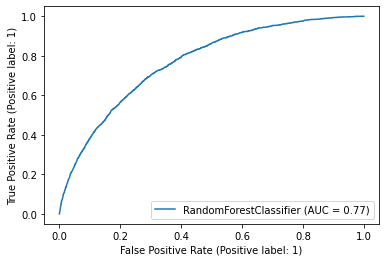

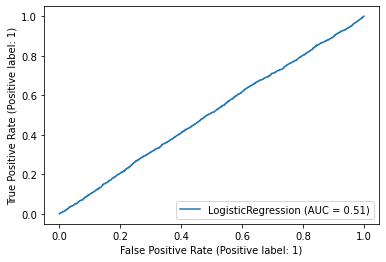

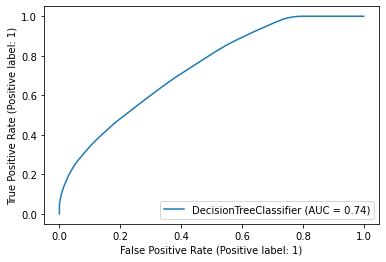

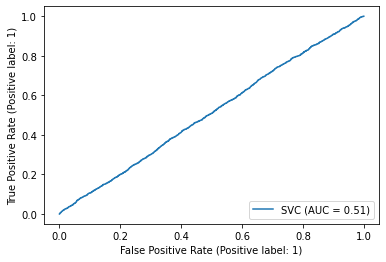

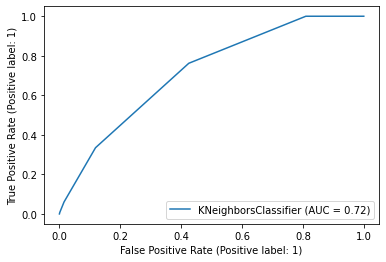

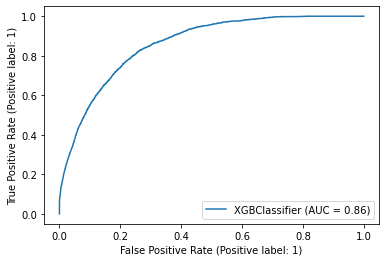

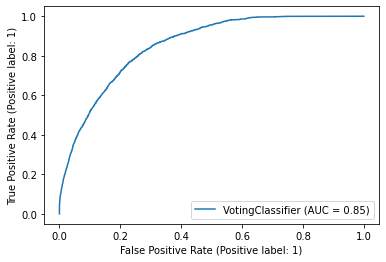

In [204]:
eval_model(models,x_train,y_train)
generate_table(models,x_train,y_train,desc="Evaluation on Train - Original Dataset ")

### Model Evaluation On test set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[1744    0]
 [ 468    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[1744    0]
 [ 468    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



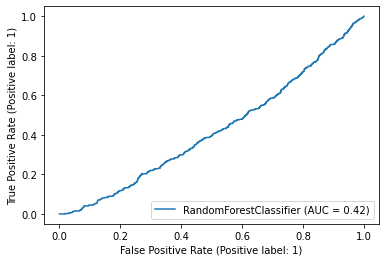

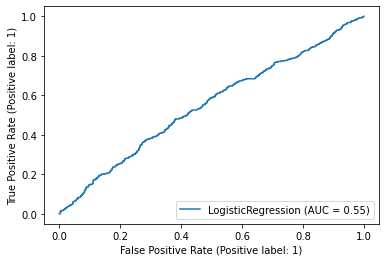

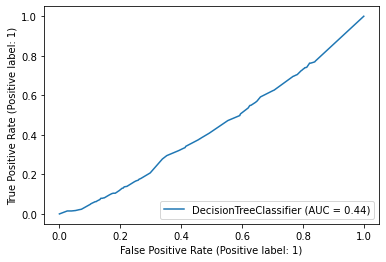

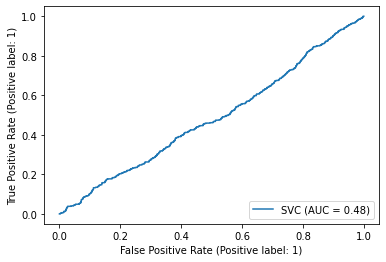

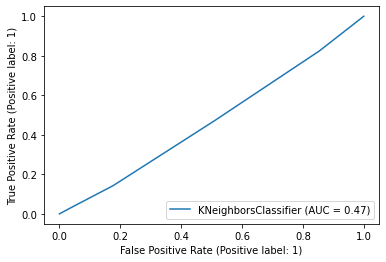

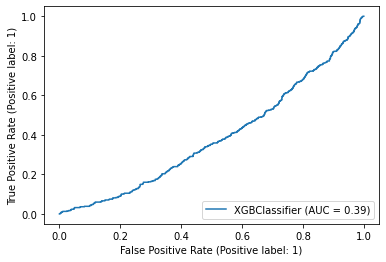

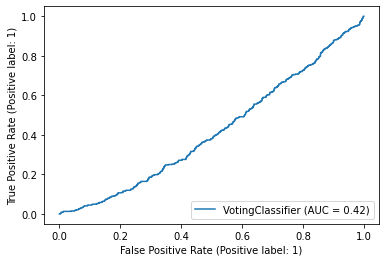

In [205]:
eval_model(models,x_test,y_test)
generate_table(models,x_test,y_test,desc="\n\n Evaluation on Test - Original Dataset \n\n")

## 3.2 Balanced Dataset using Kmeans SMOTE

In [206]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [207]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import KMeansSMOTE
oversample = KMeansSMOTE(kmeans_estimator=6, cluster_balance_threshold=0.2, random_state=22)

x_train_smote, y_train_smote = oversample.fit_resample(x_train_scaled, y_train)

from sklearn.model_selection import train_test_split
x_train_smote, x_val_smote, y_train_smote, y_val_smote = train_test_split(x_train_smote,
                                                    y_train_smote,
                                                    test_size=0.1,
                                                    random_state = 10)

In [208]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    78.430929
1    21.569071
Name: STATUS, dtype: float64

In [209]:
# after using SMOTE 
y_train_smote.value_counts(normalize=True)*100

1    50.164118
0    49.835882
Name: STATUS, dtype: float64

### Machine Learning Model after Balancing

In [210]:
models = fit_model(x_train_smote,y_train_smote)

[10:02:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Model evaluation on training set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[5060 1165]
 [1491 4775]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      6225
           1       0.80      0.76      0.78      6266

    accuracy                           0.79     12491
   macro avg       0.79      0.79      0.79     12491
weighted avg       0.79      0.79      0.79     12491



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[3829 2396]
 [2428 3838]]

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.61      6225
           1       0.62      0.61      0.61      6266

    accuracy                           0.61     12491
   macro avg       0.61      0.61      0.61     12491
weighted avg       0.61      0.61      0.61     12491



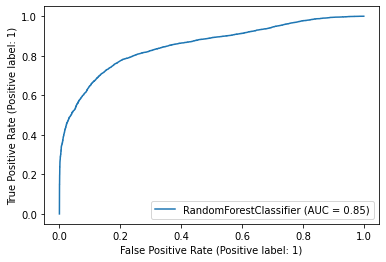

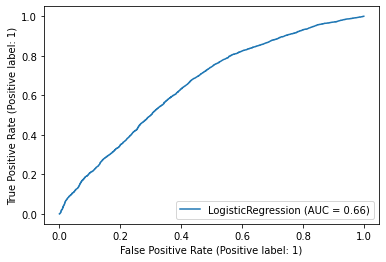

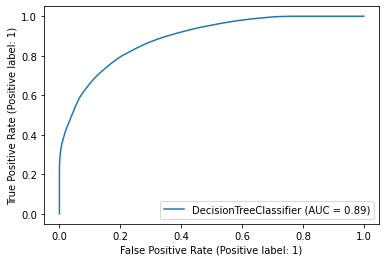

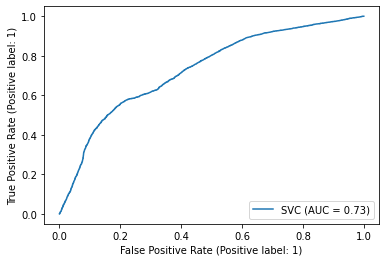

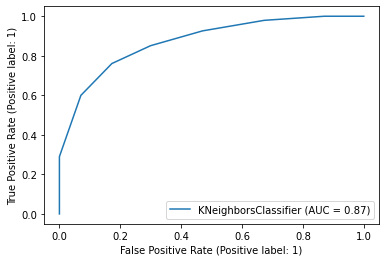

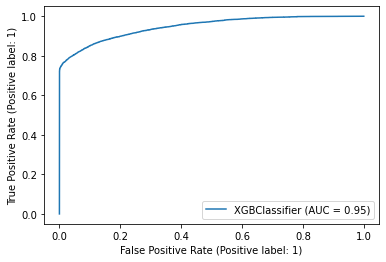

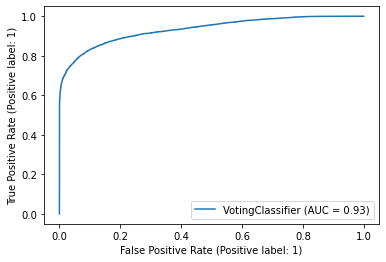

In [211]:
eval_model(models,x_train_smote,y_train_smote)
generate_table(models,x_train_smote,y_train_smote,desc="\n\n Evaluation on Train - SMOTE \n\n ")

### Model evaluation on validation set

In [212]:
# eval_model(models,x_val_smote,y_val_smote)


### Model evaluation on test set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[1376  368]
 [ 381   87]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1744
           1       0.19      0.19      0.19       468

    accuracy                           0.66      2212
   macro avg       0.49      0.49      0.49      2212
weighted avg       0.66      0.66      0.66      2212



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[1062  682]
 [ 296  172]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.68      1744
           1       0.20      0.37      0.26       468

    accuracy                           0.56      2212
   macro avg       0.49      0.49      0.47      2212
weighted avg       0.66      0.56      0.59      2212



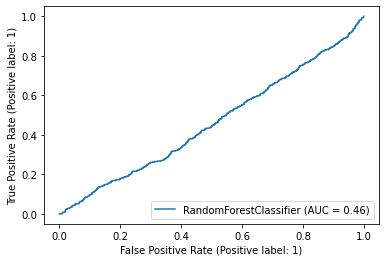

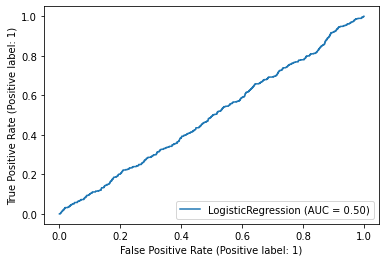

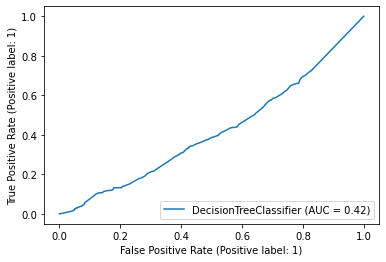

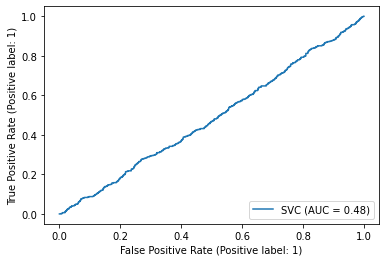

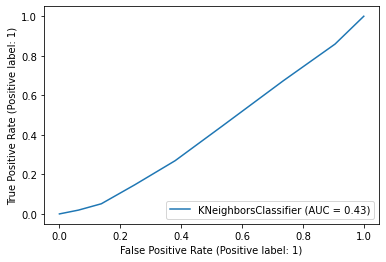

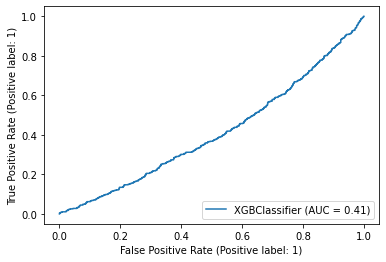

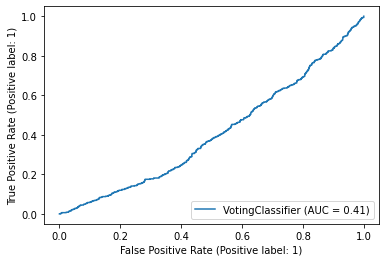

In [213]:
eval_model(models,x_test_scaled,y_test)
generate_table(models,x_test_scaled,y_test,desc="\n\n Evaluation on Test - SMOTE Dataset \n\n ")

In [214]:
# pip install ctgan

## 3.3 Balanced using GAN

In [215]:
from ctgan import CTGANSynthesizer
df = pd.concat([x_train,y_train],axis=1)
ctgan = CTGANSynthesizer()
ctgan.fit(df, cat_cols)



In [216]:
samples = ctgan.sample(15000)
samples = samples[samples['STATUS'] == 1]
train_gan = pd.concat([df, samples],axis=0)

In [217]:
train_gan.STATUS.value_counts()

1    7607
0    6938
Name: STATUS, dtype: int64

In [218]:
y_train_gan = train_gan['STATUS']
x_train_gan = train_gan.drop(['STATUS'], axis=1)
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_gan = pd.DataFrame(MMS.fit_transform(x_train_gan), columns=x_train_gan.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

x_train_gan, x_val_gan, y_train_gan, y_val_gan = train_test_split(x_train_gan,
                                                    y_train_gan,
                                                    test_size=0.2,
                                                    random_state = 10)

### Training Models on GAN-balanced dataset

In [219]:
models = fit_model(x_train_gan,y_train_gan)

[10:07:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Model evaluation on training set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[5502   31]
 [1542 4561]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      5533
           1       0.99      0.75      0.85      6103

    accuracy                           0.86     11636
   macro avg       0.89      0.87      0.86     11636
weighted avg       0.89      0.86      0.86     11636



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[3027 2506]
 [2043 4060]]

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57      5533
           1       0.62      0.67      0.64      6103

    accuracy                           0.61     11636
   macro avg       0.61      0.61      0.61     11636
weighted avg       0.61      0.61      0.61     11636



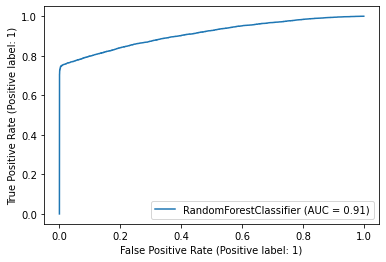

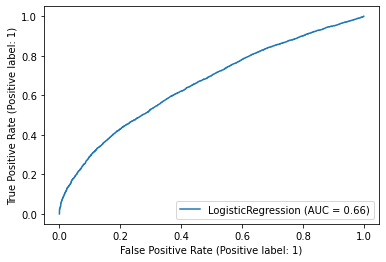

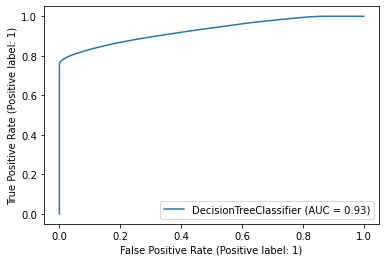

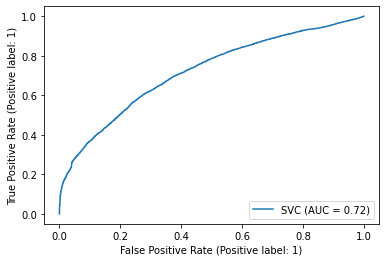

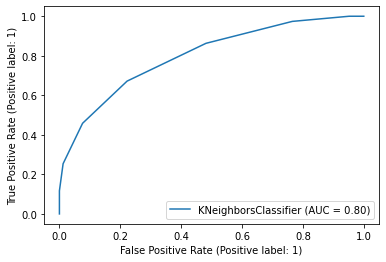

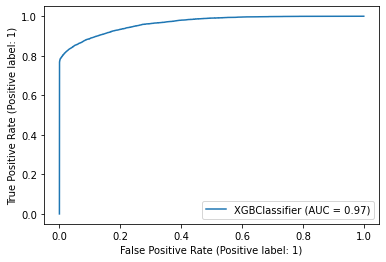

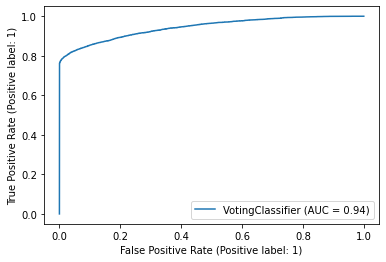

In [220]:
eval_model(models,x_train_gan,y_train_gan)
generate_table(models,x_train_gan,y_train_gan,desc="\n\n Evaluation on Train - GAN-balanced Dataset \n\n ")

### Model evaluation on validation set

In [221]:
# eval_model(models,x_val_gan,y_val_gan)


### Model evaluation on test set


==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[1730   14]
 [ 464    4]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      1744
           1       0.22      0.01      0.02       468

    accuracy                           0.78      2212
   macro avg       0.51      0.50      0.45      2212
weighted avg       0.67      0.78      0.70      2212



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[1000  744]
 [ 257  211]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67      1744
           1       0.22      0.45      0.30       468

    accuracy                           0.55      2212
   macro avg       0.51      0.51      0.48      2212
weighted avg       0.67      0.55      0.59      2212



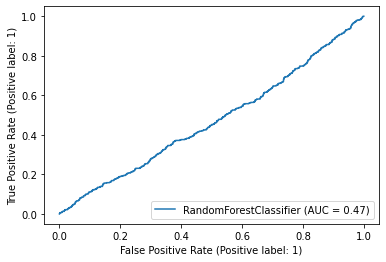

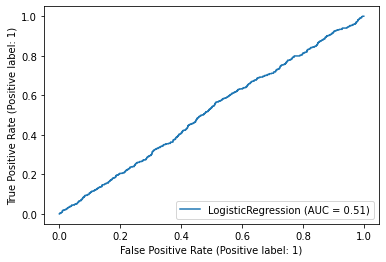

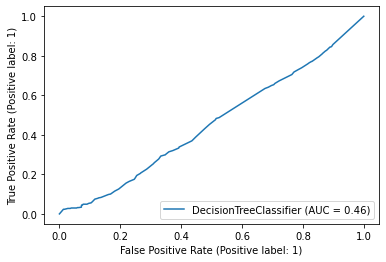

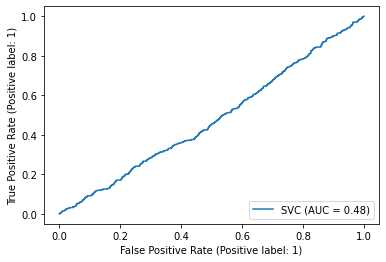

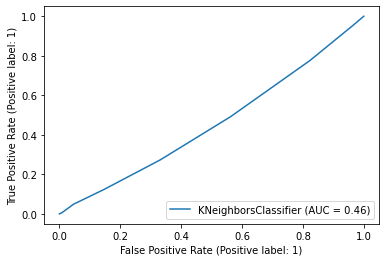

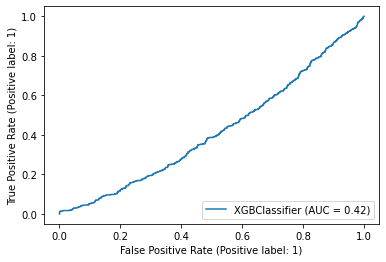

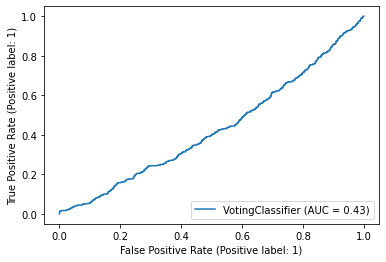

In [222]:
eval_model(models,x_test_scaled,y_test)
generate_table(models,x_test_scaled,y_test,desc="\n\n Evaluation on Test - GAN-balanced Dataset \n\n ")

In [223]:
document.save('result.docx')


### K-Fold Cross Validation

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [110]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

NameError: name 'log_model' is not defined

In [ ]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

### Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit=StratifiedShuffleSplit(n_splits=5,test_size=0.30)

In [ ]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

In [ ]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)